## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
from tensorflow.python import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hero3C\Anaconda3\envs\keras\lib\site-packages\tensorflow\pyth

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from tensorflow.python.keras.regularizers import l1, l2, l1_l2


def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
l1_l2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in l1_l2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rul

Epoch 46/50
50000/50000 [==============================] - 4s 77us/sample - loss: 2.4626 - accuracy: 0.0961 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 4s 77us/sample - loss: 2.4626 - accuracy: 0.0983 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 4s 74us/sample - loss: 2.4626 - accuracy: 0.0969 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 4s 76us/sample - loss: 2.4626 - accuracy: 0.0978 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 4s 78us/sample - loss: 2.4626 - accuracy: 0.0987 - val_loss: 2.4626 - val_accuracy: 0.1000
Experiment with Regulizer = 0.000100
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         


50000/50000 [==============================] - 4s 77us/sample - loss: 2.9080 - accuracy: 0.6138 - val_loss: 3.1715 - val_accuracy: 0.5152
Epoch 44/50
50000/50000 [==============================] - 4s 75us/sample - loss: 2.8744 - accuracy: 0.6131 - val_loss: 3.0876 - val_accuracy: 0.5303
Epoch 45/50
50000/50000 [==============================] - 4s 77us/sample - loss: 2.8303 - accuracy: 0.6177 - val_loss: 3.0795 - val_accuracy: 0.5231
Epoch 46/50
50000/50000 [==============================] - 4s 78us/sample - loss: 2.7913 - accuracy: 0.6180 - val_loss: 3.0719 - val_accuracy: 0.5116
Epoch 47/50
50000/50000 [==============================] - 4s 77us/sample - loss: 2.7478 - accuracy: 0.6249 - val_loss: 2.9938 - val_accuracy: 0.5276
Epoch 48/50
50000/50000 [==============================] - 4s 74us/sample - loss: 2.7114 - accuracy: 0.6232 - val_loss: 2.9606 - val_accuracy: 0.5293
Epoch 49/50
50000/50000 [==============================] - 4s 77us/sample - loss: 2.6736 - accuracy: 0.6242 - va

50000/50000 [==============================] - 4s 77us/sample - loss: 0.9930 - accuracy: 0.6509 - val_loss: 1.3527 - val_accuracy: 0.5252
Epoch 41/50
50000/50000 [==============================] - 4s 78us/sample - loss: 0.9766 - accuracy: 0.6572 - val_loss: 1.3563 - val_accuracy: 0.5252
Epoch 42/50
50000/50000 [==============================] - 4s 78us/sample - loss: 0.9643 - accuracy: 0.6608 - val_loss: 1.3738 - val_accuracy: 0.5262
Epoch 43/50
50000/50000 [==============================] - 4s 75us/sample - loss: 0.9538 - accuracy: 0.6652 - val_loss: 1.3564 - val_accuracy: 0.5369
Epoch 44/50
50000/50000 [==============================] - 4s 77us/sample - loss: 0.9406 - accuracy: 0.6709 - val_loss: 1.3577 - val_accuracy: 0.5336
Epoch 45/50
50000/50000 [==============================] - 4s 77us/sample - loss: 0.9283 - accuracy: 0.6748 - val_loss: 1.4318 - val_accuracy: 0.5111
Epoch 46/50
50000/50000 [==============================] - 4s 77us/sample - loss: 0.9168 - accuracy: 0.6774 - va

50000/50000 [==============================] - 4s 79us/sample - loss: 1.0309 - accuracy: 0.6367 - val_loss: 1.3700 - val_accuracy: 0.5189
Epoch 38/50
50000/50000 [==============================] - 4s 77us/sample - loss: 1.0176 - accuracy: 0.6416 - val_loss: 1.4688 - val_accuracy: 0.4992
Epoch 39/50
50000/50000 [==============================] - 4s 79us/sample - loss: 1.0059 - accuracy: 0.6454 - val_loss: 1.3595 - val_accuracy: 0.5217
Epoch 40/50
50000/50000 [==============================] - 4s 80us/sample - loss: 0.9915 - accuracy: 0.6532 - val_loss: 1.4084 - val_accuracy: 0.5140
Epoch 41/50
50000/50000 [==============================] - 4s 77us/sample - loss: 0.9821 - accuracy: 0.6536 - val_loss: 1.3517 - val_accuracy: 0.5312
Epoch 42/50
50000/50000 [==============================] - 4s 77us/sample - loss: 0.9647 - accuracy: 0.6609 - val_loss: 1.3453 - val_accuracy: 0.5291
Epoch 43/50
50000/50000 [==============================] - 4s 77us/sample - loss: 0.9550 - accuracy: 0.6657 - va

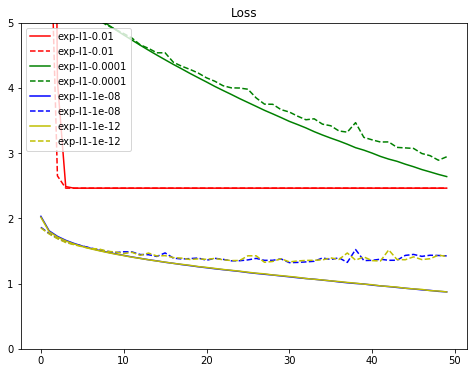

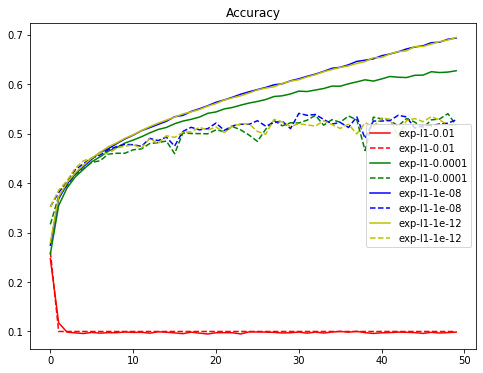

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()